# Calculate and save footprints over entire period.

* ## Intersect with a map of the basin 

* ### Query given footprints and calculate contours

In [1]:
%matplotlib notebook
import sys
import os
import numpy as np
import pandas as pd
from Klujn_2015_FootprinModel.calc_footprint_FFP_climatology_SkeeterEdits import FFP_climatology

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, shape

import rasterio
from rasterio import features
from rasterio.transform import from_origin
from matplotlib import pyplot as plt

from shapely.geometry import shape
from shapely.geometry import MultiPolygon

from geopandas import GeoDataFrame
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from functools import partial
from multiprocessing import Pool
import time

from rasterio.plot import show

# Date Range & Paramters

In [6]:
FirstRun = False
DateRange=['2016-6-23 10:00:00','2016-8-23 20:30:00']
Axis = 40
rs = [50,75,90]
dx = 1
XY = [516097.33,7707931.12]
nx = 1000 
fp_params={'dx':dx,'nx':nx,'rs':rs}
west = XY[0]-(nx*dx)/2
north = XY[1]+(nx*dx)/2

## Footprints

In [ ]:
Time = time.time()
Data = pd.read_csv('C:/Illisarvik/FilteredData2018-04-16.csv')
Data = Data.set_index(pd.DatetimeIndex(Data.datetime))
Data['Run']=0
Data.loc[((np.isfinite(Data['Zo'])==True)&np.isfinite(Data['co2_flux'])==True)&(Data['u*']>.1)&
         (Data.index>DateRange[0])&(Data.index<DateRange[1])&
         ((Data['wind_dir']<Axis+180-30)|(Data['wind_dir']>Axis+180+30)),
         ['Run']]=1
Data=Data.reset_index(drop=True)
Dates = Data['datetime']
Transform = from_origin(west,north,dx,dx)
with rasterio.open('temp.tif','w',driver='GTiff',width = nx+1, height = nx+1,count = 1,dtype=np.float64,
                   affine = Transform,crs = ({'init': 'EPSG:32608'})) as out:
    out_arr = out.read(1)
    params = out.profile

Run = Data.loc[Data['Run']==1].reset_index().drop(['index'],axis=1)

def Run_Func(i,Run,fp_params):
    FP = FFP_climatology(zm=[Run['Zm'].iloc[i]],z0=[Run['Zo'].iloc[i]],h=[Run['PBLH'].iloc[i]],
                            ol=[Run['L'].iloc[i]],sigmav=[Run['v_var'].iloc[i]],ustar=[Run['u*'].iloc[i]],
                            wind_dir=[Run['wind_dir'].iloc[i]],
                             **fp_params,
                             )
    
    fpf = np.flipud(FP['fclim_2d'])*dx**2
    fpf/=fpf.sum()
    return(fpf)

for i in range(Run.shape[0]):
    Name = str(Run['datetime'].iloc[i]).replace(' ','').replace('-','').replace(':','')
    print(Name)
    out = Run_Func(i,Run,fp_params)
    out /= out.sum()
    out_arr+=out
    with rasterio.open('C:/Illisarvik/Footprints/30min/'+str(Name)+'.tif','w',
                       driver='GTiff',width = nx, height = nx,count = 1,dtype=np.float64,
                       affine = Transform,crs = ({'init': 'EPSG:32608'})) as Writer:
        Writer.write(out,1)
        show(Writer)
out_arr /= i+1
with rasterio.open('C:/Illisarvik/Footprints/Climatology.tif','w',
                   driver='GTiff',width = nx, height = nx,count = 1,dtype=np.float64,
                   affine = Transform,crs = ({'init': 'EPSG:32608'})) as Writer:
    Writer.write(out_arr,1)
    show(Writer)
        
Copy = out_arr+0.0
FlatCopy = np.sort(Copy.ravel())[::-1]

Cumsum = np.sort(Copy.ravel())[::-1].cumsum()

d = {}
d['contour'] = []
geometry = list()
for r in [.25,.50,.70,.80,.90]:
    
    pct = FlatCopy[np.where(Cumsum < r)]
    Mask = out_arr+0.0
    Mask[Mask>=pct[-1]] = 1
    Mask[Mask<pct[-1]] = np.nan
    multipart = 'No'
    for shp, val in features.shapes(Mask.astype('int16'), transform=Transform):
        if val == 1:
            d['contour'].append(r)
            Poly = shape(shp)
            Poly = Poly.buffer(dx, join_style=1).buffer(-dx, join_style=1)
            Poly = Poly.buffer(-dx, join_style=1).buffer(dx, join_style=1)
            if multipart == 'No':
                geometry.append(Poly)
            else:
                Multi = []
                for part in geometry[-1]:
                    Multi.append(part)
                Multi.append(Poly)
                geometry[-1]=MulitPolygon(Multi)
            mulitpart = 'Yes'
df = pd.DataFrame(data=d)

geo_df = GeoDataFrame(df,crs={'init': 'EPSG:32608'},geometry = geometry)
geo_df['area'] =  geo_df.area 
geo_df.to_file('Climatology.shp', driver = 'ESRI Shapefile')
geo_df.plot(facecolor='None',edgecolor='black')

print('Finished!')
print(time.time()-Time)

20160710223000
20160710230000
20160711033000
20160711040000
20160711043000
20160711050000
20160711053000
20160711060000
20160711100000
20160711103000
20160711110000
20160711113000
20160711120000
20160711123000
20160711133000
20160711140000
20160711150000
20160711153000
20160711160000
20160711163000
20160711170000
20160711173000
20160711180000
20160711183000
20160711190000
20160711193000
20160711203000
20160711210000
20160711213000
20160711220000
20160711223000
20160711230000
20160711233000
20160712013000
20160712020000
20160712023000
20160712030000
20160712033000
20160712040000
20160712043000
20160712050000
20160712053000
20160712060000
20160712063000
20160712070000
20160712080000
20160712083000
20160712090000
20160712093000
20160712100000
20160712103000
20160712110000
20160712113000
20160712120000
20160712123000
20160712130000
20160712133000
20160712140000
20160712143000
20160712150000
20160712153000
20160712160000
20160712163000
20160712170000
20160712173000
20160712180000
2016071218

## Basin Map

<generator object <genexpr> at 0x00000261DE31D3B8>


<IPython.core.display.Javascript object>


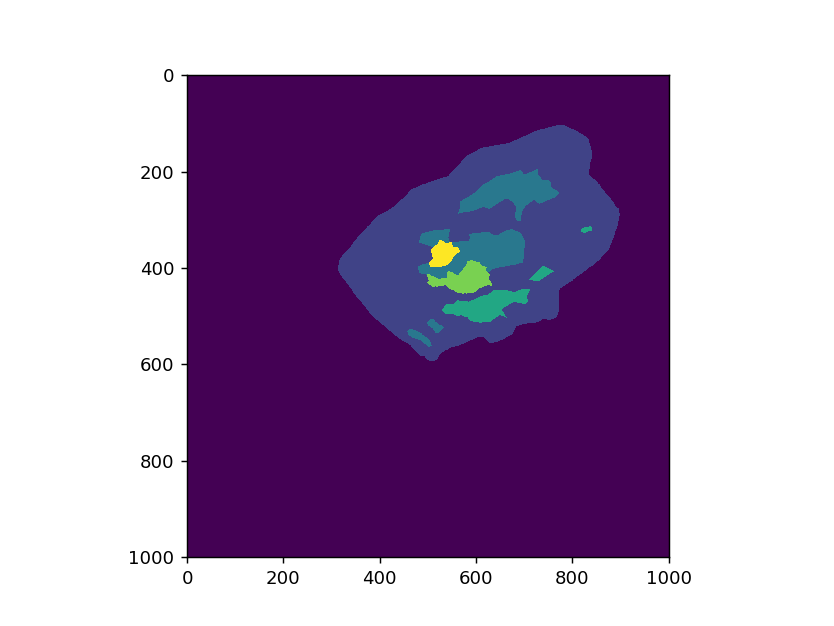

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1001, 'height': 1001, 'count': 1, 'crs': CRS({}), 'transform': (515597.33, 1.0, 0.0, 7708431.12, 0.0, -1.0), 'affine': Affine(1.0, 0.0, 515597.33,
       0.0, -1.0, 7708431.12), 'tiled': False, 'interleave': 'band'}


In [5]:
Basin = gpd.read_file('C:/Illisarvik/Vegetation1.2.shp')
Basin['Area'] = Basin.area
Basin['Dkey'] = 1
BasinBounds = Basin.dissolve(by='Dkey').geometry[1]  

shapes = ((geom,value) for geom,value in zip(Basin['geometry'],Basin['Code']))
print(shapes)

west = XY[0]-(nx*dx)/2
north = XY[1]+(nx*dx)/2
Transform = from_origin(west,north,dx,dx)

plt.figure()

with rasterio.open('temp.tif','w',driver='GTiff',width = nx+1, height = nx+1,count = 1,dtype=np.float64,
                   affine = Transform,crs = ({'init': 'EPSG:32608'})) as out:
    out_arr = out.read(1)
    params = out.profile
    Image = features.rasterize(shapes=shapes,fill = 100,out = out_arr,transform = out.transform,default_value=0)

    plt.imshow(Image)
print(params)

## Intersect Function

In [ ]:
def Intersection():
    

In [ ]:
i= 2133
print(Run['Zm'].iloc[i],Run['Zo'].iloc[i],Run['PBLH'].iloc[i],
                            Run['L'].iloc[i],Run['v_var'].iloc[i],Run['u*'].iloc[i],
                        Run['wind_dir'].iloc[i])
i= 1
print(Run['Zm'].iloc[i],Run['Zo'].iloc[i],Run['PBLH'].iloc[i],
                            Run['L'].iloc[i],Run['v_var'].iloc[i],Run['u*'].iloc[i],
                        Run['wind_dir'].iloc[i])
A = Run_Func(i,Run,fp_params)
print(A)